In [178]:
import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torchvision.models as models
import os, numpy as np

from utils import train_model, test_model, draw_figure, generateAdamOptimizer, generateSgdOptimizer
from custom_resnet18 import CustomResNet18
from lenet import LeNet

## Loading datasets

In [155]:
data_transforms = {
    'train': transforms.Compose([
        transforms.ToTensor()
    ]),
    'val': transforms.Compose([
        transforms.ToTensor(),
    ]),
    'test': transforms.Compose([
        transforms.ToTensor(),
    ])
}

data_dir = 'tiny-imagenet-200'

image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val', 'test']}
               
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=100,
                                             shuffle=True, num_workers=20)
              for x in ['train', 'val', 'test']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val', 'test']}

## Variables

In [156]:
criterion = nn.CrossEntropyLoss()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
epochs_resnet = 20

## Resnet18 with filter 7x7

#### SGD optimizer

In [157]:
model_resnet_18_standard = models.resnet18()
model_resnet_18_standard.avgpool = nn.AdaptiveAvgPool2d(1)
num_ftrs = model_resnet_18_standard.fc.in_features
model_resnet_18_standard.fc = nn.Linear(num_ftrs, 200)
model_resnet_18_standard = model_resnet_18_standard.to(device)
optimizer_rn_sgd = generateSgdOptimizer(model_resnet_18_standard)

In [158]:
model_resnet_18_standard, train_losses_resnet18_standard, train_accuracies_resnet18_standard, validation_losses_resnet18_standard, validation_accuracies_resnet18_standard = train_model(
    model_resnet_18_standard, dataloaders, dataset_sizes, criterion, optimizer_rn_sgd, epochs_resnet
)

----------------------------------------
Epoch 1/20
Train Loss: 5.0684 Train Accuracy: 0.0278
Validation Loss: 4.7883 Validation Accuracy: 0.0502
----------------------------------------
Epoch 2/20
Train Loss: 4.5379 Train Accuracy: 0.0789
Validation Loss: 4.3540 Validation Accuracy: 0.0990
----------------------------------------
Epoch 3/20
Train Loss: 4.1482 Train Accuracy: 0.1269
Validation Loss: 4.0389 Validation Accuracy: 0.1313
----------------------------------------
Epoch 4/20
Train Loss: 3.8296 Train Accuracy: 0.1705
Validation Loss: 3.8044 Validation Accuracy: 0.1699
----------------------------------------
Epoch 5/20
Train Loss: 3.5828 Train Accuracy: 0.2080
Validation Loss: 3.6365 Validation Accuracy: 0.1979
----------------------------------------
Epoch 6/20
Train Loss: 3.3813 Train Accuracy: 0.2433
Validation Loss: 3.5416 Validation Accuracy: 0.2137
----------------------------------------
Epoch 7/20
Train Loss: 3.1969 Train Accuracy: 0.2755
Validation Loss: 3.4783 Valida

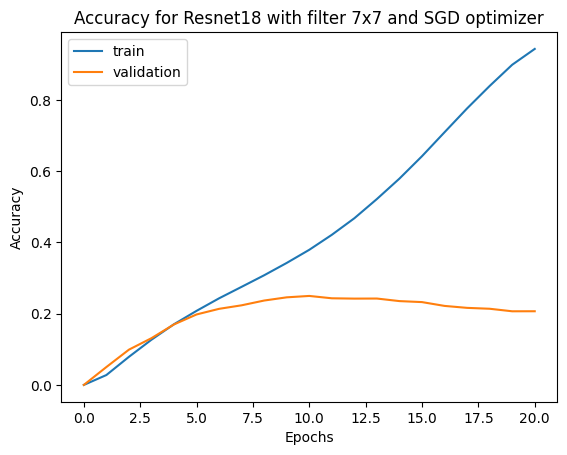

In [159]:
draw_figure(epochs_resnet+1, train_accuracies_resnet18_standard, validation_accuracies_resnet18_standard, 'Accuracy for Resnet18 with filter 7x7 and SGD optimizer', 'Accuracy', 0)

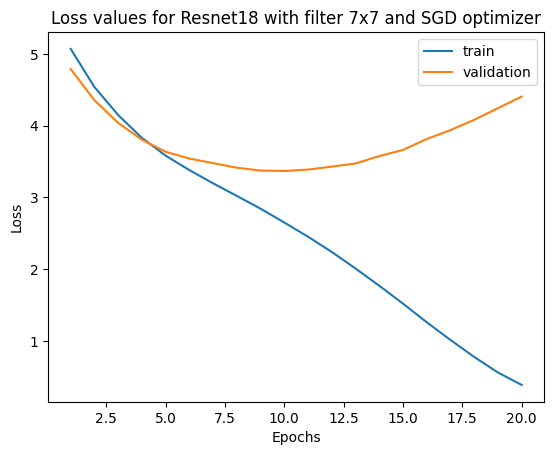

In [160]:
draw_figure(epochs_resnet+1, train_losses_resnet18_standard, validation_losses_resnet18_standard, 'Loss values for Resnet18 with filter 7x7 and SGD optimizer', 'Loss', 1)

In [161]:
test_loss_standard_resnet18, test_accuracy_standard_resnet18 = test_model(model_resnet_18_standard, dataloaders, criterion)

Test Loss: 9.0860 Test Accuracy: 0.6900


#### Adam optimizer

In [162]:
model_resnet_18_standard_Adam = models.resnet18()
model_resnet_18_standard_Adam.avgpool = nn.AdaptiveAvgPool2d(1)
num_ftrs = model_resnet_18_standard_Adam.fc.in_features
model_resnet_18_standard_Adam.fc = nn.Linear(num_ftrs, 200)
model_resnet_18_standard_Adam = model_resnet_18_standard_Adam.to(device)
optimizer_rn_adam = generateSgdOptimizer(model_resnet_18_standard_Adam)

In [163]:
model_resnet_18_standard_Adam, train_losses_resnet18_standard_Adam, train_accuracies_resnet18_standard_Adam, validation_losses_resnet18_standard_Adam, validation_accuracies_resnet18_standard_Adam = train_model(
    model_resnet_18_standard_Adam, dataloaders, dataset_sizes, criterion, optimizer_rn_adam, epochs_resnet
)

----------------------------------------
Epoch 1/20
Train Loss: 5.0715 Train Accuracy: 0.0272
Validation Loss: 4.7862 Validation Accuracy: 0.0528
----------------------------------------
Epoch 2/20
Train Loss: 4.5635 Train Accuracy: 0.0781
Validation Loss: 4.3976 Validation Accuracy: 0.0958
----------------------------------------
Epoch 3/20
Train Loss: 4.1666 Train Accuracy: 0.1251
Validation Loss: 4.0532 Validation Accuracy: 0.1382
----------------------------------------
Epoch 4/20
Train Loss: 3.8468 Train Accuracy: 0.1679
Validation Loss: 3.8230 Validation Accuracy: 0.1688
----------------------------------------
Epoch 5/20
Train Loss: 3.6002 Train Accuracy: 0.2054
Validation Loss: 3.6494 Validation Accuracy: 0.1935
----------------------------------------
Epoch 6/20
Train Loss: 3.3933 Train Accuracy: 0.2412
Validation Loss: 3.5577 Validation Accuracy: 0.2097
----------------------------------------
Epoch 7/20
Train Loss: 3.2103 Train Accuracy: 0.2731
Validation Loss: 3.4610 Valida

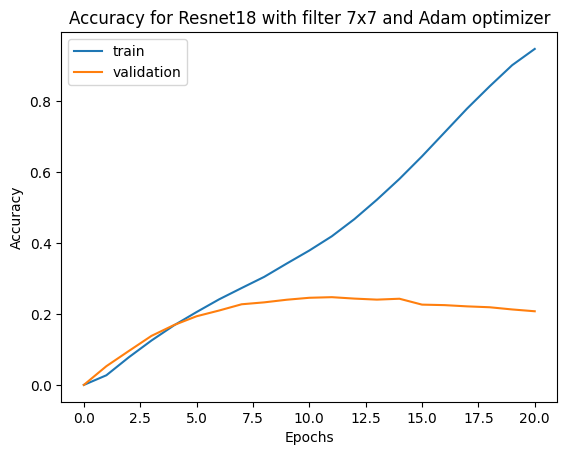

In [164]:
draw_figure(epochs_resnet+1, train_accuracies_resnet18_standard_Adam, validation_accuracies_resnet18_standard_Adam, 'Accuracy for Resnet18 with filter 7x7 and Adam optimizer', 'Accuracy', 0)

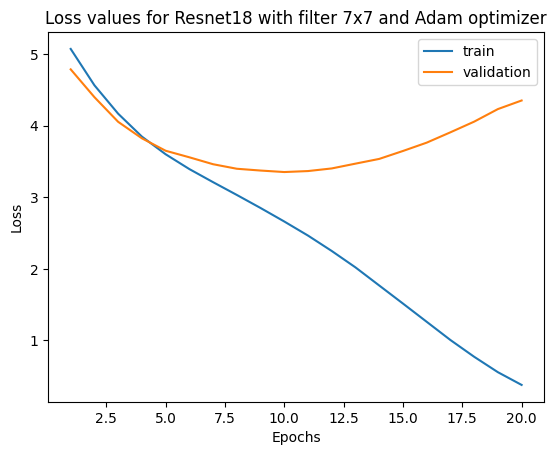

In [165]:
draw_figure(epochs_resnet+1, train_losses_resnet18_standard_Adam, validation_losses_resnet18_standard_Adam, 'Loss values for Resnet18 with filter 7x7 and Adam optimizer', 'Loss', 1)

In [166]:
test_loss_standard_resnet18_Adam, test_accuracy_standard_resnet18_Adam = test_model(model_resnet_18_standard_Adam, dataloaders, criterion)

Test Loss: 9.0427 Test Accuracy: 0.6600


## Resnet18 with filter 5x5

#### SGD optimizer

In [167]:
model_custom_resnet18_sgd = CustomResNet18().to(device)
optimizer_custom_resnet18_sgd = generateSgdOptimizer(model_custom_resnet18_sgd)

model_custom_resnet18_sgd , train_losses_custom_resnet18_sgd, train_accuracies_custom_resnet18_sgd, validation_losses_custom_resnet18_sgd, validation_accuracies_custom_resnet18_sgd = train_model(
    model_custom_resnet18_sgd, dataloaders, dataset_sizes, criterion, optimizer_custom_resnet18_sgd, epochs_resnet
)

----------------------------------------
Epoch 1/20
Train Loss: 5.0195 Train Accuracy: 0.0334
Validation Loss: 4.6742 Validation Accuracy: 0.0629
----------------------------------------
Epoch 2/20
Train Loss: 4.4435 Train Accuracy: 0.0854
Validation Loss: 4.2717 Validation Accuracy: 0.1041
----------------------------------------
Epoch 3/20
Train Loss: 4.0979 Train Accuracy: 0.1273
Validation Loss: 3.9704 Validation Accuracy: 0.1437
----------------------------------------
Epoch 4/20
Train Loss: 3.8371 Train Accuracy: 0.1622
Validation Loss: 3.8057 Validation Accuracy: 0.1644
----------------------------------------
Epoch 5/20
Train Loss: 3.6267 Train Accuracy: 0.1924
Validation Loss: 3.6080 Validation Accuracy: 0.1940
----------------------------------------
Epoch 6/20
Train Loss: 3.4495 Train Accuracy: 0.2224
Validation Loss: 3.4637 Validation Accuracy: 0.2150
----------------------------------------
Epoch 7/20
Train Loss: 3.2962 Train Accuracy: 0.2493
Validation Loss: 3.3453 Valida

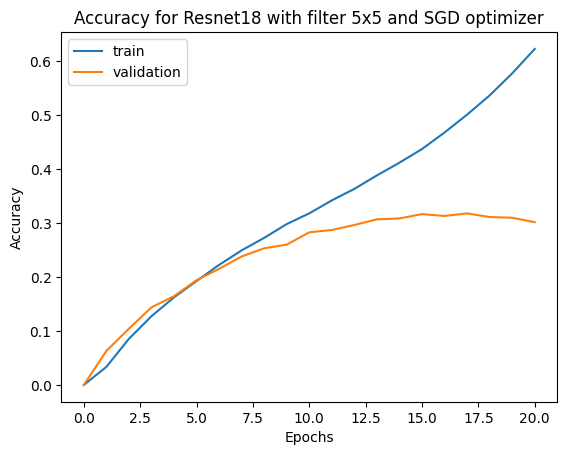

In [168]:
draw_figure(epochs_resnet+1, train_accuracies_custom_resnet18_sgd, validation_accuracies_custom_resnet18_sgd, 'Accuracy for Resnet18 with filter 5x5 and SGD optimizer', 'Accuracy', 0)

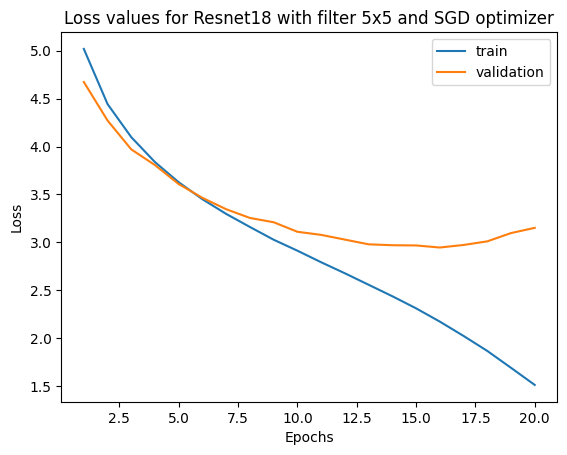

In [172]:
draw_figure(epochs_resnet+1, train_losses_custom_resnet18_sgd, validation_losses_custom_resnet18_sgd, 'Loss values for Resnet18 with filter 5x5 and SGD optimizer', 'Loss', 1)

In [170]:
test_loss_custom_resnet18_sgd, test_accuracy_custom_resnet18_sgd = test_model(model_custom_resnet18_sgd, dataloaders, criterion)

Test Loss: 10.2806 Test Accuracy: 0.5600


#### Adam optimizer

In [173]:
model_custom_resnet18_adam = CustomResNet18().to(device)
optimizer_custom_resnet18_adam = generateSgdOptimizer(model_custom_resnet18_adam)

model_custom_resnet18_adam , train_losses_custom_resnet18_adam, train_accuracies_custom_resnet18_adam, validation_losses_custom_resnet18_adam, validation_accuracies_custom_resnet18_adam = train_model(
    model_custom_resnet18_adam, dataloaders, dataset_sizes, criterion, optimizer_custom_resnet18_adam, epochs_resnet
)

----------------------------------------
Epoch 1/20
Train Loss: 5.0361 Train Accuracy: 0.0327
Validation Loss: 4.7247 Validation Accuracy: 0.0620
----------------------------------------
Epoch 2/20
Train Loss: 4.4839 Train Accuracy: 0.0839
Validation Loss: 4.2652 Validation Accuracy: 0.1074
----------------------------------------
Epoch 3/20
Train Loss: 4.0939 Train Accuracy: 0.1293
Validation Loss: 3.9419 Validation Accuracy: 0.1472
----------------------------------------
Epoch 4/20
Train Loss: 3.8126 Train Accuracy: 0.1669
Validation Loss: 3.7446 Validation Accuracy: 0.1762
----------------------------------------
Epoch 5/20
Train Loss: 3.6054 Train Accuracy: 0.1972
Validation Loss: 3.6038 Validation Accuracy: 0.1990
----------------------------------------
Epoch 6/20
Train Loss: 3.4338 Train Accuracy: 0.2255
Validation Loss: 3.4560 Validation Accuracy: 0.2255
----------------------------------------
Epoch 7/20
Train Loss: 3.2846 Train Accuracy: 0.2497
Validation Loss: 3.3682 Valida

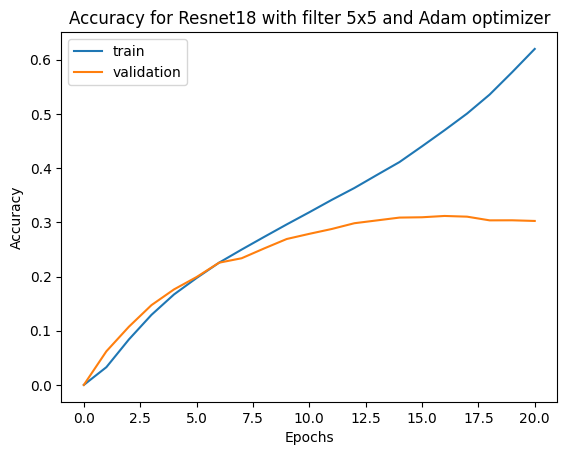

In [174]:
draw_figure(epochs_resnet+1, train_accuracies_custom_resnet18_adam, validation_accuracies_custom_resnet18_adam, 'Accuracy for Resnet18 with filter 5x5 and Adam optimizer', 'Accuracy', 0)

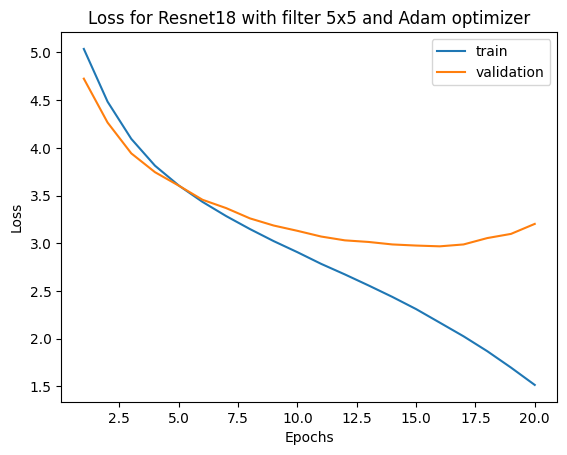

In [175]:
draw_figure(epochs_resnet+1, train_losses_custom_resnet18_adam, validation_losses_custom_resnet18_adam, 'Loss for Resnet18 with filter 5x5 and Adam optimizer', 'Loss', 1)

In [177]:
test_loss_custom_resnet18_adam, test_accuracy_custom_resnet18_adam = test_model(model_custom_resnet18_adam, dataloaders, criterion)

Test Loss: 10.0563 Test Accuracy: 0.3300


## LeNet with filter 5x5

In [204]:
epochs_lenet = 500

#### Loading datasets

In [205]:
data_transforms_lenet = {
    'train': transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Resize(32, antialias=True)
    ]),
    'val': transforms.Compose([
        transforms.ToTensor(),
        transforms.Resize(32, antialias=True)
    ]),
    'test': transforms.Compose([
        transforms.ToTensor(),
        transforms.Resize(32, antialias=True)
    ])
}

data_dir = 'tiny-imagenet-200'

image_datasets_lenet = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms_lenet[x])
                  for x in ['train', 'val', 'test']}
               
dataloaders_lenet = {x: torch.utils.data.DataLoader(image_datasets_lenet[x], batch_size=100,
                                             shuffle=True, num_workers=20)
              for x in ['train', 'val', 'test']}
dataset_sizes_lenet = {x: len(image_datasets_lenet[x]) for x in ['train', 'val', 'test']}

#### SGD Optimizer

In [206]:
model_lenet_filter5_sgd = LeNet(5, 400).to(device)
optimizer_lenet_filter5 = generateSgdOptimizer(model_lenet_filter5_sgd)

In [207]:
model_lenet_filter5_sgd , train_losses_lenet_filter5_sgd, train_accuracies_lenet_filter5_sgd, validation_losses_lenet_filter5_sgd, validation_accuracies_lenet_filter5_sgd = train_model(
    model_lenet_filter5_sgd, dataloaders_lenet, dataset_sizes_lenet, criterion, optimizer_lenet_filter5, epochs_lenet
)

----------------------------------------
Epoch 1/500
Train Loss: 5.3002 Train Accuracy: 0.0044
Validation Loss: 5.2999 Validation Accuracy: 0.0038
----------------------------------------
Epoch 2/500
Train Loss: 5.2996 Train Accuracy: 0.0041
Validation Loss: 5.2993 Validation Accuracy: 0.0036
----------------------------------------
Epoch 3/500
Train Loss: 5.2990 Train Accuracy: 0.0042
Validation Loss: 5.2986 Validation Accuracy: 0.0037
----------------------------------------
Epoch 4/500
Train Loss: 5.2981 Train Accuracy: 0.0044
Validation Loss: 5.2975 Validation Accuracy: 0.0047
----------------------------------------
Epoch 5/500
Train Loss: 5.2967 Train Accuracy: 0.0054
Validation Loss: 5.2953 Validation Accuracy: 0.0055
----------------------------------------
Epoch 6/500
Train Loss: 5.2921 Train Accuracy: 0.0061
Validation Loss: 5.2860 Validation Accuracy: 0.0075
----------------------------------------
Epoch 7/500
Train Loss: 5.2615 Train Accuracy: 0.0077
Validation Loss: 5.2158

Exception ignored in: Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fd4ba02b2e0><function _MultiProcessingDataLoaderIter.__del__ at 0x7fd4ba02b2e0>

Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
Exception ignored in:   File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
<function _MultiProcessingDataLoaderIter.__del__ at 0x7fd4ba02b2e0>    self._shutdown_workers()
    Traceback (most recent call last):

  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
self._shutdown_workers()    
self._shutdown_workers()  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers

   

Train Loss: 3.9075 Train Accuracy: 0.1633
Validation Loss: 4.1524 Validation Accuracy: 0.1375
----------------------------------------
Epoch 87/500
Train Loss: 3.9024 Train Accuracy: 0.1646
Validation Loss: 4.1554 Validation Accuracy: 0.1387
----------------------------------------
Epoch 88/500
Train Loss: 3.8990 Train Accuracy: 0.1647
Validation Loss: 4.1572 Validation Accuracy: 0.1388
----------------------------------------
Epoch 89/500
Train Loss: 3.8950 Train Accuracy: 0.1659
Validation Loss: 4.1573 Validation Accuracy: 0.1401
----------------------------------------
Epoch 90/500
Train Loss: 3.8922 Train Accuracy: 0.1657
Validation Loss: 4.1516 Validation Accuracy: 0.1403
----------------------------------------
Epoch 91/500
Train Loss: 3.8881 Train Accuracy: 0.1673
Validation Loss: 4.1598 Validation Accuracy: 0.1387
----------------------------------------
Epoch 92/500
Train Loss: 3.8850 Train Accuracy: 0.1683
Validation Loss: 4.1497 Validation Accuracy: 0.1394
------------------

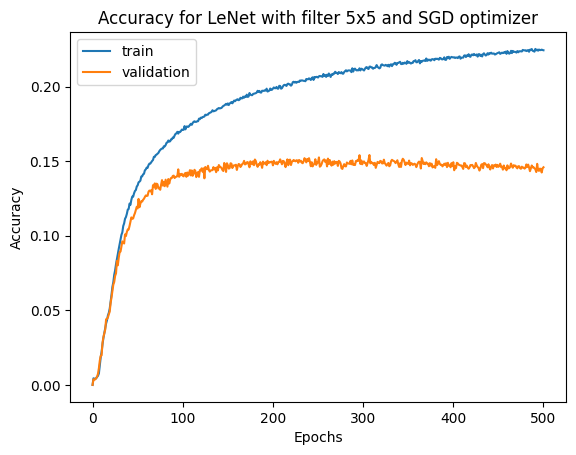

In [208]:
draw_figure(epochs_lenet+1, train_accuracies_lenet_filter5_sgd, validation_accuracies_lenet_filter5_sgd, 'Accuracy for LeNet with filter 5x5 and SGD optimizer', 'Accuracy', 0)

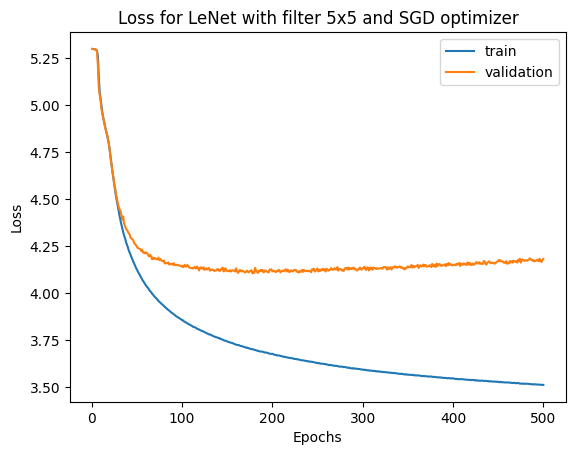

In [209]:
draw_figure(epochs_lenet+1, train_losses_lenet_filter5_sgd, validation_losses_lenet_filter5_sgd, 'Loss for LeNet with filter 5x5 and SGD optimizer', 'Loss', 1)

In [212]:
test_loss_lenet_filter5_sgd, test_accuracy_lenet_filter5_sgd = test_model(model_lenet_filter5_sgd, dataloaders_lenet, criterion)

Test Loss: 8.3789 Test Accuracy: 0.5300


#### Adam Optimizer

In [213]:
model_lenet_filter5_adam = LeNet(5, 400).to(device)
optimizer_lenet_filter5_adam = generateAdamOptimizer(model_lenet_filter5_adam)

In [214]:
model_lenet_filter5_adam , train_losses_lenet_filter5_adam, train_accuracies_lenet_filter5_adam, validation_losses_lenet_filter5_adam, validation_accuracies_lenet_filter5_adam = train_model(
    model_lenet_filter5_adam, dataloaders_lenet, dataset_sizes_lenet, criterion, optimizer_lenet_filter5_adam, epochs_lenet
)

----------------------------------------
Epoch 1/500
Train Loss: 5.0110 Train Accuracy: 0.0247
Validation Loss: 4.8500 Validation Accuracy: 0.0366
----------------------------------------
Epoch 2/500
Train Loss: 4.6936 Train Accuracy: 0.0584
Validation Loss: 4.5671 Validation Accuracy: 0.0705
----------------------------------------
Epoch 3/500
Train Loss: 4.5129 Train Accuracy: 0.0809
Validation Loss: 4.4732 Validation Accuracy: 0.0834
----------------------------------------
Epoch 4/500
Train Loss: 4.4046 Train Accuracy: 0.0923
Validation Loss: 4.3774 Validation Accuracy: 0.0937
----------------------------------------
Epoch 5/500
Train Loss: 4.3295 Train Accuracy: 0.1015
Validation Loss: 4.3605 Validation Accuracy: 0.0965
----------------------------------------
Epoch 6/500
Train Loss: 4.2805 Train Accuracy: 0.1091
Validation Loss: 4.3074 Validation Accuracy: 0.1078
----------------------------------------
Epoch 7/500
Train Loss: 4.2434 Train Accuracy: 0.1145
Validation Loss: 4.2801

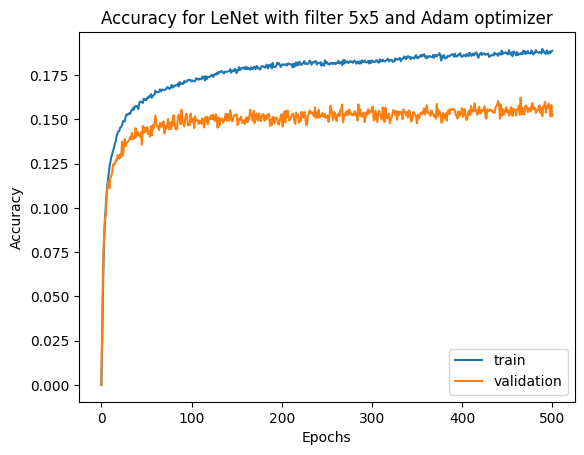

In [215]:
draw_figure(epochs_lenet+1, train_accuracies_lenet_filter5_adam, validation_accuracies_lenet_filter5_adam, 'Accuracy for LeNet with filter 5x5 and Adam optimizer', 'Accuracy', 0)

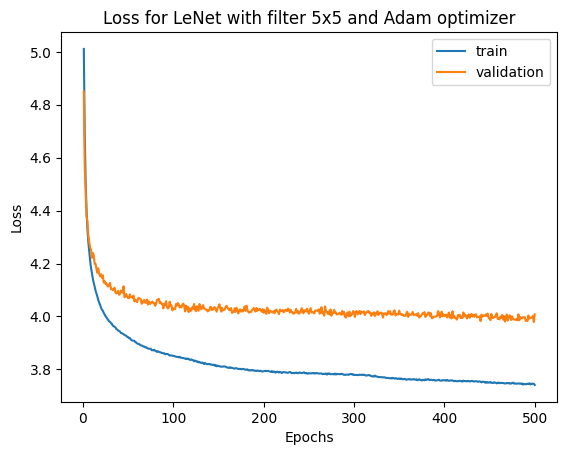

In [216]:
draw_figure(epochs_lenet+1, train_losses_lenet_filter5_adam, validation_losses_lenet_filter5_adam, 'Loss for LeNet with filter 5x5 and Adam optimizer', 'Loss', 1)

In [217]:
test_loss_lenet_filter5_adam, test_accuracy_lenet_filter5_adam = test_model(model_lenet_filter5_adam, dataloaders_lenet, criterion)

Test Loss: 8.0314 Test Accuracy: 0.6800


## LeNet with filter 7x7

#### SGD optimizer

In [218]:
model_lenet_filter7_sgd = LeNet(7, 144).to(device)
optimizer_lenet_filter7_sgd = generateSgdOptimizer(model_lenet_filter7_sgd)

In [219]:
model_lenet_filter7_sgd , train_losses_lenet_filter7_sgd, train_accuracies_lenet_filter7_sgd, validation_losses_lenet_filter7_sgd, validation_accuracies_lenet_filter7_sgd = train_model(
    model_lenet_filter7_sgd, dataloaders_lenet, dataset_sizes_lenet, criterion, optimizer_lenet_filter7_sgd, epochs_lenet
)

----------------------------------------
Epoch 1/500
Train Loss: 5.3002 Train Accuracy: 0.0045
Validation Loss: 5.2998 Validation Accuracy: 0.0048
----------------------------------------
Epoch 2/500
Train Loss: 5.2997 Train Accuracy: 0.0044
Validation Loss: 5.2992 Validation Accuracy: 0.0043
----------------------------------------
Epoch 3/500
Train Loss: 5.2990 Train Accuracy: 0.0047
Validation Loss: 5.2984 Validation Accuracy: 0.0060
----------------------------------------
Epoch 4/500
Train Loss: 5.2980 Train Accuracy: 0.0070
Validation Loss: 5.2969 Validation Accuracy: 0.0080
----------------------------------------
Epoch 5/500
Train Loss: 5.2954 Train Accuracy: 0.0084
Validation Loss: 5.2923 Validation Accuracy: 0.0093
----------------------------------------
Epoch 6/500
Train Loss: 5.2818 Train Accuracy: 0.0103
Validation Loss: 5.2556 Validation Accuracy: 0.0102
----------------------------------------
Epoch 7/500
Train Loss: 5.1951 Train Accuracy: 0.0113
Validation Loss: 5.1364

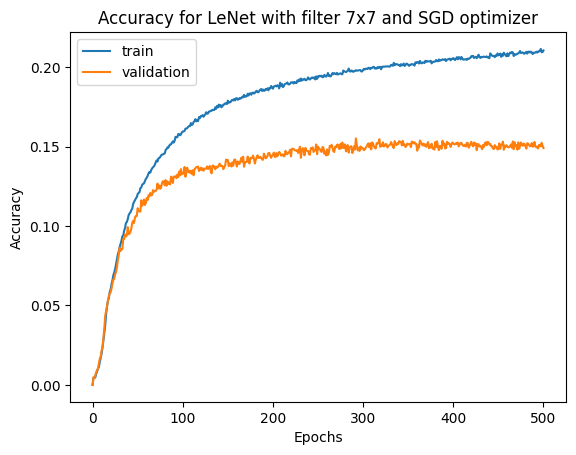

In [222]:
draw_figure(epochs_lenet+1, train_accuracies_lenet_filter7_sgd, validation_accuracies_lenet_filter7_sgd, 'Accuracy for LeNet with filter 7x7 and SGD optimizer', 'Accuracy', 0)

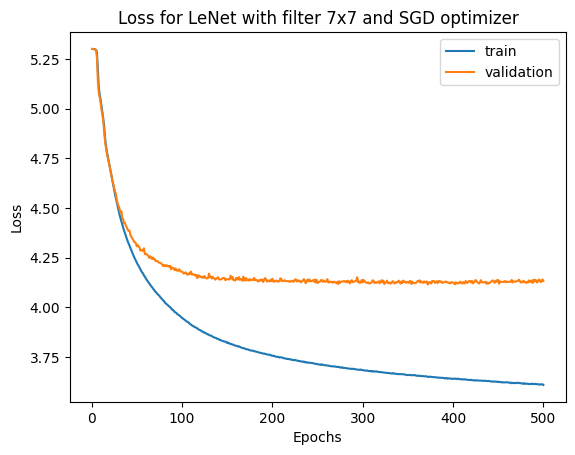

In [223]:
draw_figure(epochs_lenet+1, train_losses_lenet_filter7_sgd, validation_losses_lenet_filter7_sgd, 'Loss for LeNet with filter 7x7 and SGD optimizer', 'Loss', 1)

In [224]:
test_loss_filter7_sgd, test_accuracy_filter7_sgd = test_model(model_lenet_filter7_sgd, dataloaders_lenet, criterion)

Test Loss: 8.3308 Test Accuracy: 0.4400


#### Adam optimizer

In [ ]:
model_lenet_filter7_adam = LeNet(7, 144).to(device)
optimizer_lenet_filter7 = generateAdamOptimizer(model_lenet_filter7_adam)

In [ ]:
model_lenet_filter7_adam = train_model(model_lenet_filter7_adam, dataloaders_lenet, dataset_sizes_lenet, criterion, optimizer_lenet_filter7, 1)

In [ ]:
test_loss, test_accuracy = test_model(model_lenet_filter7_adam, dataloaders_lenet, criterion)